<a href="https://colab.research.google.com/github/bala-codes/BENIGN-VS-MALIGNANT-URL-ML-CLASSIFIER/blob/master/codes/Part%202%20of%20URL%20Classifier%20Single%20Input%20Edition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IF YOU ARE USING GOOGLE COLABORATORY AND IF YOUR DATA IS STORED IN GOOGLE DRIVE, THEN RUN THIS CODE OTHERWISE DON'T EXECUTE

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import pickle
import re
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
with open("/content/gdrive/My Drive/Machine Learning Projects/BENIGN VS MALIGNANT URL CLASSIFIER/Pre-Trained Models/logreg_classifier.pkl","rb") as fin:
  vectorizer, logreg_classifier = pickle.load(fin)

with open("/content/gdrive/My Drive/Machine Learning Projects/BENIGN VS MALIGNANT URL CLASSIFIER/Pre-Trained Models/nb_classifier.pkl","rb") as fin:
  vectorizer, nb_classifier = pickle.load(fin)

with open("/content/gdrive/My Drive/Machine Learning Projects/BENIGN VS MALIGNANT URL CLASSIFIER/Pre-Trained Models/bb_classifier.pkl","rb") as fin:
  vectorizer, bb_classifier = pickle.load(fin)
 
with open("/content/gdrive/My Drive/Machine Learning Projects/BENIGN VS MALIGNANT URL CLASSIFIER/Pre-Trained Models/svc_classifier.pkl","rb") as fin:
  vectorizer, svc_classifier = pickle.load(fin)

with open("/content/gdrive/My Drive/Machine Learning Projects/BENIGN VS MALIGNANT URL CLASSIFIER/Pre-Trained Models/pac_classifier.pkl","rb") as fin:
  vectorizer, pac_classifier = pickle.load(fin)
 
with open("/content/gdrive/My Drive/Machine Learning Projects/BENIGN VS MALIGNANT URL CLASSIFIER/Pre-Trained Models/calibrator_classifier.pkl","rb") as fin:
  vectorizer, calibrator_classifier = pickle.load(fin)

with open("/content/gdrive/My Drive/Machine Learning Projects/BENIGN VS MALIGNANT URL CLASSIFIER/Pre-Trained Models/knn_classifier.pkl","rb") as fin:
  vectorizer, knn_classifier = pickle.load(fin)

print("SUCCESS ~ ALL MODELS LOADED")

SUCCESS ~ ALL MODELS LOADED


In [ ]:
# Required Functions to predict the News
def prediction(text):
  test = vectorizer.transform(text)
  graph,output = ensemble(test)

  if output == 1:
    value = 'GOOD'
  else:
    value = 'BAD'

  class_labels = ['BAD','GOOD']
  j = [graph[0][0],graph[0][1]]
  y_pos = np.arange(len(class_labels))
  plt.barh(y_pos,j)
  plt.yticks(y_pos,class_labels)
  print()
  plt.title('PREDICTION FOR BEING BAD VS GOOD')
  plt.ylabel('Percentage')
  plt.xlabel('Labels')
  plt.show()
  print()
  start = "\033[1m"
  end = "\033[0;0m"
  print('THE GIVEN URL IS ' + start + str(value) + end)

def ensemble(x):
  pred1 = logreg_classifier.predict_proba(x)
  pred2 = nb_classifier.predict_proba(x)
  pred3 = svc_classifier._predict_proba_lr(x)
  pred4 = pac_classifier._predict_proba_lr(x)
  pred5 = calibrator_classifier.predict_proba(x)
  pred6 = knn_classifier.predict_proba(x)
  pred7 = bb_classifier.predict_proba(x)

  test_pred_prob = np.mean([pred1, pred2, pred3, pred4, pred5, pred6, pred7], axis=0)
  pred = np.argmax(test_pred_prob, axis=1)
  print(test_pred_prob)
  return test_pred_prob,pred

def text_cleaner(text):
  s = re.sub(r"['!#$%&\'()*+,-./:;<=>?@//\\^_`{|}~']",' ',text)
  return s

def cleaner(text):
  Segments = text.rpartition('//')
  x = Segments[2]
  x = text_cleaner(x)
  x=[x,]
  return x


# GIVE YOUR INPUT HERE

ENTER THE URL HERE : https://link.springer.com/referenceworkentry/10.1007%2F978-0-387-39940-9_465
[[0.16484781 0.83515219]]



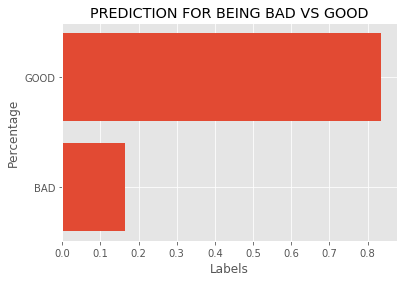


THE GIVEN URL IS GOOD


In [ ]:
#String input
URL = input("ENTER THE URL HERE : ")
prediction(cleaner(URL))